In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Emplearemos un conjunto de datos sencillo, altura y edad de los alumnos en clase. ¿Podemos derivar uno del otro?

$$

altura = \beta_1 edad + \beta_0

$$

In [53]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

# Ejercicio 1.

Obten un dataframe de los datos indicados.

In [54]:
# Aquí va vuestro código
df_alumnos = pd.DataFrame(lista_alumnos, columns=['Nombre', 'Edad', 'Altura'])
df_alumnos 

,Nombre,Edad,Altura
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90
5,Miguel N,27,1.80
6,Alejandro M,28,1.70
7,Cristina M,32,1.60
8,Francisco P,36,1.74
9,Jorge D,45,1.72


# Ejercicio 2

Realiza una descripción de las distribuciones de las variables.

In [55]:
# Aquí va vuestro código

df_alumnos.describe()

,Edad,Altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


# Ejercicio 3

Divide el conjunto de datos en _train_ y _test_

In [56]:
df_alumnos.columns

Index(['Nombre', 'Edad', 'Altura'], dtype='object')

In [57]:
features = [
    'Edad']

target = 'Altura'

In [58]:
X = df_alumnos[features]
X

,Edad
0,24
1,25
2,35
3,37
4,29
5,27
6,28
7,32
8,36
9,45


In [59]:
y = df_alumnos[target]
y

0     1.82
1     1.71
2     1.66
3     1.63
4     1.90
5     1.80
6     1.70
7     1.60
8     1.74
9     1.72
10    1.65
11    1.65
12    1.60
13    1.80
14    1.77
15    1.75
16    1.70
17    1.80
18    1.77
19    1.70
20    1.80
Name: Altura, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)

In [61]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (21, 1)
Train features shape: (12, 1)
Train target shape: (12,)
Test features shape: (9, 1)
Test target shape: (9,)


# Ejercicio 4

Entrena un modelo de regresión lineal

In [62]:
from sklearn.linear_model import LinearRegression

# Aquí va vuestro código

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

# Ejercicio 5

Analiza los coeficientes.

In [63]:
lm.score(X_test, y_test)


0.10148441604944669

In [64]:
lm.score(X_train, y_train)

0.06237563602461882

In [65]:
# ...
print(lm.intercept_)

1.8263273453093813


In [66]:
print(lm.coef_)

[-0.00327345]


In [67]:
coeff_df = pd.DataFrame(lm.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
Edad,-0.003273


# Ejercicio 6

Evalúa visualmente el modelo.

In [68]:
X_test

,Edad
0,24
17,34
15,32
1,25
8,36
5,27
11,30
3,37
18,27


In [69]:
# plt...
predictions = lm.predict(X_test)
predictions

array([1.74776447, 1.71502994, 1.72157685, 1.74449102, 1.70848303,
       1.73794411, 1.72812375, 1.70520958, 1.73794411])

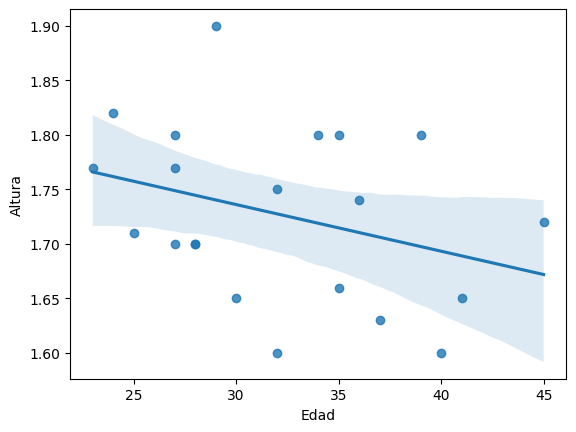

In [73]:
#sns.scatterplot(x = y_test, y = predictions);

sns.regplot(data = df_alumnos,
           x = 'Edad',
           y = 'Altura');

# Ejercicio 7

Obtén las métricas de error relevantes para este modelo.

In [51]:
# ...
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.05545353736970501
MSE: 0.003563002537838497
RMSE: 0.05969089158186948
